In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy,categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
devices=tf.config.experimental.list_physical_devices('GPU')
print("GPUS: ", len(devices))
tf.config.experimental.set_memory_growth(devices[0],True)

GPUS:  1


In [3]:
train_path = 'data/train'
test_path  = 'data/test'

In [4]:
train_batches = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory=train_path,target_size=(32,32),color_mode="grayscale",class_mode='binary',batch_size=16,shuffle=True)
test_batches = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory=test_path,target_size=(32,32),color_mode="grayscale",batch_size=16,shuffle=True)

Found 1800 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


In [5]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,16,figsize=(15,15))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


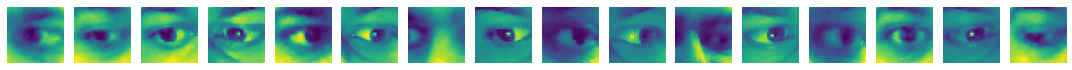

['1.0 ', '1.0 ', '1.0 ', '1.0 ', '0.0 ', '0.0 ', '1.0 ', '1.0 ', '0.0 ', '0.0 ', '0.0 ', '0.0 ', '0.0 ', '1.0 ', '0.0 ', '1.0 ']


In [15]:
imgs,labels= next(train_batches) 

plotImages(imgs)
print([f'{labels[x]} ' for x in range(len(labels))])

In [ ]:
print(imgs.shape)

In [16]:
model= Sequential([
                   Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,1)),
                   MaxPool2D(pool_size=(2,2),strides=1),
                   Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                   MaxPool2D(pool_size=(2,2),strides=1),
                   Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                   MaxPool2D(pool_size=(2,2)),
                   Flatten(),
                   Dense(units=50,activation='relu'),
                   Dense(units=1,activation='sigmoid')
                 ]
        )  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy')

In [19]:
model.fit(x=train_batches,epochs=10,verbose=2)

  ...
    to  
  ['...']
Train for 113 steps
Epoch 1/10
113/113 - 1s - loss: 0.0147
Epoch 2/10
113/113 - 1s - loss: 0.0113
Epoch 3/10
113/113 - 1s - loss: 0.0109
Epoch 4/10
113/113 - 1s - loss: 0.0108
Epoch 5/10
113/113 - 1s - loss: 0.0089
Epoch 6/10
113/113 - 1s - loss: 0.0066
Epoch 7/10
113/113 - 1s - loss: 0.0057
Epoch 8/10
113/113 - 1s - loss: 0.0062
Epoch 9/10
113/113 - 1s - loss: 0.0046
Epoch 10/10
113/113 - 1s - loss: 0.0040


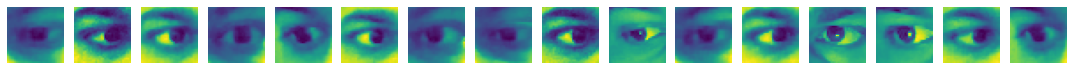

['[0. 1.]', '[1. 0.]', '[1. 0.]', '[0. 1.]', '[0. 1.]', '[1. 0.]', '[0. 1.]', '[0. 1.]', '[1. 0.]', '[0. 1.]', '[0. 1.]', '[1. 0.]', '[0. 1.]', '[0. 1.]', '[1. 0.]', '[0. 1.]']


In [24]:
test_set,labels = next(test_batches)
plotImages(test_set)
print([f'{labels[x]}' for x in range(len(labels))])

In [21]:
np.round(model.predict(test_set), 2)

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)